### Regresson Project: Regression Model to predict housing prices

Team:
- Chuk Leng Lim
- Dennis Nkansah-Tieku
- Sebastian Günther
- Alen Pavlic Ravser

### Library

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
import datetime

from scipy.stats import probplot
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.preprocessing import Normalizer
from haversine import haversine

%matplotlib inline

### Data Load

In [2]:
## Reading an csv file into the notebook and assigning the file as 'data'
data = pd.read_csv('regression_data_clean.csv')

In [3]:
## Checking for the individual columns in the table
data.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


### DATA EXPLORATION 

The aim of this section is to be able to understand and have a good overview of the individual variables

In [4]:
# checking data shape
data.shape

(21597, 21)

In [5]:
# Checking type
data.dtypes

id                 int64
date              object
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
price              int64
dtype: object

In [6]:
#numerical
data.select_dtypes(include=np.number)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [7]:
# other than numerical
data.select_dtypes(exclude=np.number)

,date
0,10/13/14
1,12/9/14
2,2/25/15
3,12/9/14
4,2/18/15
...,...
21592,5/21/14
21593,2/23/15
21594,6/23/14
21595,1/16/15


In [8]:
#Checking for null values
pd.isnull(data).any()

id               False
date             False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
price            False
dtype: bool

### Separate to categorical / numerical variables


In [9]:
data['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [10]:
# dropping id 
data = data.drop(['id'], axis = 1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [11]:
data.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [12]:
data['lat'].max()

47.7776

In [13]:
data['lat'].min()

47.1559

In [14]:
data['long'].max()

-121.315

In [15]:
data['long'].min()

-122.51899999999999

In [16]:
data['coordinate'] = tuple(zip(data.lat, data.long))

In [17]:
seattle = [47.6092, -122.3363]
bellevue = [47.61555, -122.20392]

In [18]:
haversine(seattle, bellevue)

9.94847391617156

In [19]:
data['coordinate']

0                   (47.5112, -122.257)
1        (47.721000000000004, -122.319)
2        (47.7379, -122.23299999999999)
3        (47.5208, -122.39299999999999)
4                   (47.6168, -122.045)
                      ...              
21592               (47.6993, -122.346)
21593    (47.5107, -122.36200000000001)
21594    (47.5944, -122.29899999999999)
21595               (47.5345, -122.069)
21596    (47.5941, -122.29899999999999)
Name: coordinate, Length: 21597, dtype: object

In [20]:
seattle_distance = []
for i in data['coordinate']:
    seattle_distance.append(haversine((seattle),(i), unit='mi'))
data['distance_from_seattle'] = pd.Series(seattle_distance)

bellevue_distance = []
for i in data['coordinate']:
    bellevue_distance.append(haversine(bellevue,i, unit='mi'))
data['distance_from_bellevue'] = pd.Series(bellevue_distance)

In [21]:
data['distance_from_center'] = data[['distance_from_bellevue', 'distance_from_seattle']].min(axis=1)

In [22]:
# changing numerical to categorical object 

data['bedrooms'] = data['bedrooms'].astype('object')
data['bathrooms'] = data['bathrooms'].astype('object')
data['floors'] = data['floors'].astype('object')
data['waterfront'] = data['waterfront'].astype('object')
data['view'] = data['view'].astype('object')
data['condition'] = data['condition'].astype('object')
data['grade'] = data['grade'].astype('object')
data['lat'] = data['lat'].astype('object')
data['long'] = data['long'].astype('object')
data['zipcode'] = data['zipcode'].astype('object')

In [23]:
data['distance_from_center']

0        7.622786
1        7.766476
2        8.561145
3        6.655340
4        7.402273
           ...   
21592    6.241665
21593    6.910386
21594    2.016289
21595    8.420838
21596    2.026885
Name: distance_from_center, Length: 21597, dtype: float64

In [24]:
data = data.drop(['distance_from_bellevue', 'distance_from_seattle'], axis = 1)

In [25]:
# adding lat_long by grouping lat and long to 4 bins
latbins = pd.cut(data.lat, 4, labels=[f'lat{k}' for k in range(1,4+1)], retbins=True)
longbins = pd.cut(data.long, 4, labels=[f'long{k}' for k in range(1,4+1)], retbins=True)

data['lat_long'] = [f'{latbins[0][row]}_{longbins[0][row]}' for row in data.index]

In [26]:
# changing lat_long to categorical and dropping lat, long
data['lat_long'] = data['lat_long'].astype('object')
data = data.drop(['lat','long'], axis = 1)

In [27]:
data['lat_long'].unique()

array(['lat3_long1', 'lat4_long1', 'lat3_long2', 'lat4_long2',
       'lat1_long1', 'lat2_long1', 'lat2_long2', 'lat1_long2',
       'lat3_long3', 'lat2_long3', 'lat4_long3', 'lat1_long3',
       'lat4_long4', 'lat2_long4'], dtype=object)

In [28]:
# converting datetime to year and month as object
data['date'] = pd.to_datetime(data['date']).dt.strftime('%y%m')
data['date'] = data['date'].astype('object')

In [29]:
data.head(20)

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,coordinate,distance_from_center,lat_long
0,1410,3,1,1180,5650,1,0,0,3,7,...,0,1955,0,98178,1340,5650,221900,"(47.5112, -122.257)",7.622786,lat3_long1
1,1412,3,2.25,2570,7242,2,0,0,3,7,...,400,1951,1991,98125,1690,7639,538000,"(47.721000000000004, -122.319)",7.766476,lat4_long1
2,1502,2,1,770,10000,1,0,0,3,6,...,0,1933,0,98028,2720,8062,180000,"(47.7379, -122.23299999999999)",8.561145,lat4_long1
3,1412,4,3,1960,5000,1,0,0,5,7,...,910,1965,0,98136,1360,5000,604000,"(47.5208, -122.39299999999999)",6.655340,lat3_long1
4,1502,3,2,1680,8080,1,0,0,3,8,...,0,1987,0,98074,1800,7503,510000,"(47.6168, -122.045)",7.402273,lat3_long2
5,1405,4,4.5,5420,101930,1,0,0,3,11,...,1530,2001,0,98053,4760,101930,1230000,"(47.6561, -122.005)",9.675819,lat4_long2
6,1406,3,2.25,1715,6819,2,0,0,3,7,...,0,1995,0,98003,2238,6819,257500,"(47.3097, -122.32700000000001)",20.698039,lat1_long1
7,1501,3,1.5,1060,9711,1,0,0,3,7,...,0,1963,0,98198,1650,9711,291850,"(47.4095, -122.315)",13.833719,lat2_long1
8,1504,3,1,1780,7470,1,0,0,3,7,...,730,1960,0,98146,1780,8113,229500,"(47.5123, -122.337)",6.695232,lat3_long1
9,1503,3,2.5,1890,6560,2,0,0,3,7,...,0,2003,0,98038,2390,7570,323000,"(47.3684, -122.031)",18.888531,lat2_long2


In [30]:
categorical = data.select_dtypes(include=np.object)
categorical

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,coordinate,lat_long
0,1410,3,1,1,0,0,3,7,98178,"(47.5112, -122.257)",lat3_long1
1,1412,3,2.25,2,0,0,3,7,98125,"(47.721000000000004, -122.319)",lat4_long1
2,1502,2,1,1,0,0,3,6,98028,"(47.7379, -122.23299999999999)",lat4_long1
3,1412,4,3,1,0,0,5,7,98136,"(47.5208, -122.39299999999999)",lat3_long1
4,1502,3,2,1,0,0,3,8,98074,"(47.6168, -122.045)",lat3_long2
...,...,...,...,...,...,...,...,...,...,...,...
21592,1405,3,2.5,3,0,0,3,8,98103,"(47.6993, -122.346)",lat4_long1
21593,1502,4,2.5,2,0,0,3,8,98146,"(47.5107, -122.36200000000001)",lat3_long1
21594,1406,2,0.75,2,0,0,3,7,98144,"(47.5944, -122.29899999999999)",lat3_long1
21595,1501,3,2.5,2,0,0,3,8,98027,"(47.5345, -122.069)",lat3_long2


In [31]:
numerical = data.select_dtypes(exclude=np.object)
numerical

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,distance_from_center
0,1180,5650,1180,0,1955,0,1340,5650,221900,7.622786
1,2570,7242,2170,400,1951,1991,1690,7639,538000,7.766476
2,770,10000,770,0,1933,0,2720,8062,180000,8.561145
3,1960,5000,1050,910,1965,0,1360,5000,604000,6.655340
4,1680,8080,1680,0,1987,0,1800,7503,510000,7.402273
...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,2009,0,1530,1509,360000,6.241665
21593,2310,5813,2310,0,2014,0,1830,7200,400000,6.910386
21594,1020,1350,1020,0,2009,0,1020,2007,402101,2.016289
21595,1600,2388,1600,0,2004,0,1410,1287,400000,8.420838


In [32]:
## Checking for the shape
data.shape

(21597, 21)

9 Numerical: sqft_living, sqft_lot, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15, pirce
    
10 Categorical: date, bedrooms, bathrooms, floors, waterfront, view, condition, grade, zipcode, lat_long

In [33]:
# bedrooms
data['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
33       1
11       1
Name: bedrooms, dtype: int64

In [34]:
data[data['bedrooms']== 33]

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,coordinate,distance_from_center,lat_long
15856,1406,33,1.75,1620,6000,1,0,0,5,7,...,580,1947,0,98103,1330,4700,640000,"(47.6878, -122.331)",5.436343,lat4_long1


In [35]:
#removing outlier #drop a row
data=data.drop(data['bedrooms'].index[15856])

In [36]:
data['bedrooms'].unique()

array([3, 2, 4, 5, 1, 6, 7, 8, 9, 11, 10], dtype=object)

In [37]:
#bathrooms
data['bathrooms'].value_counts()

2.50    5377
1.00    3851
1.75    3047
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.75       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [38]:
# function round up to 0.5
def round_of_bathrooms(num):
    return round(num*2)/2

data['bathrooms'] = list(map(round_of_bathrooms, data['bathrooms']))

In [39]:
data['bathrooms'] = data['bathrooms'].astype('object')
data['bathrooms'].value_counts()

2.0    7024
2.5    5377
1.0    3931
3.0    2527
1.5    1445
3.5     731
4.0     370
4.5     100
5.0      57
6.0      12
5.5      10
0.5       4
8.0       3
6.5       2
7.0       2
7.5       1
Name: bathrooms, dtype: int64

In [40]:
numerical.dtypes

sqft_living               int64
sqft_lot                  int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
sqft_living15             int64
sqft_lot15                int64
price                     int64
distance_from_center    float64
dtype: object

In [41]:
categorical.dtypes

date          object
bedrooms      object
bathrooms     object
floors        object
waterfront    object
view          object
condition     object
grade         object
zipcode       object
coordinate    object
lat_long      object
dtype: object

In [42]:
mask = np.zeros_like(numerical.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

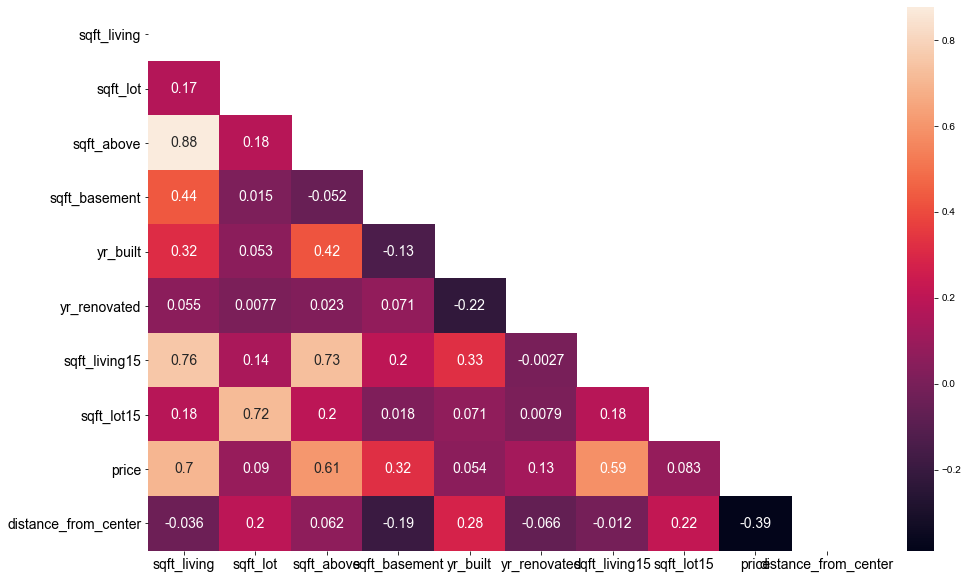

In [43]:
plt.figure(figsize=(16,10))
sns.heatmap(numerical.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

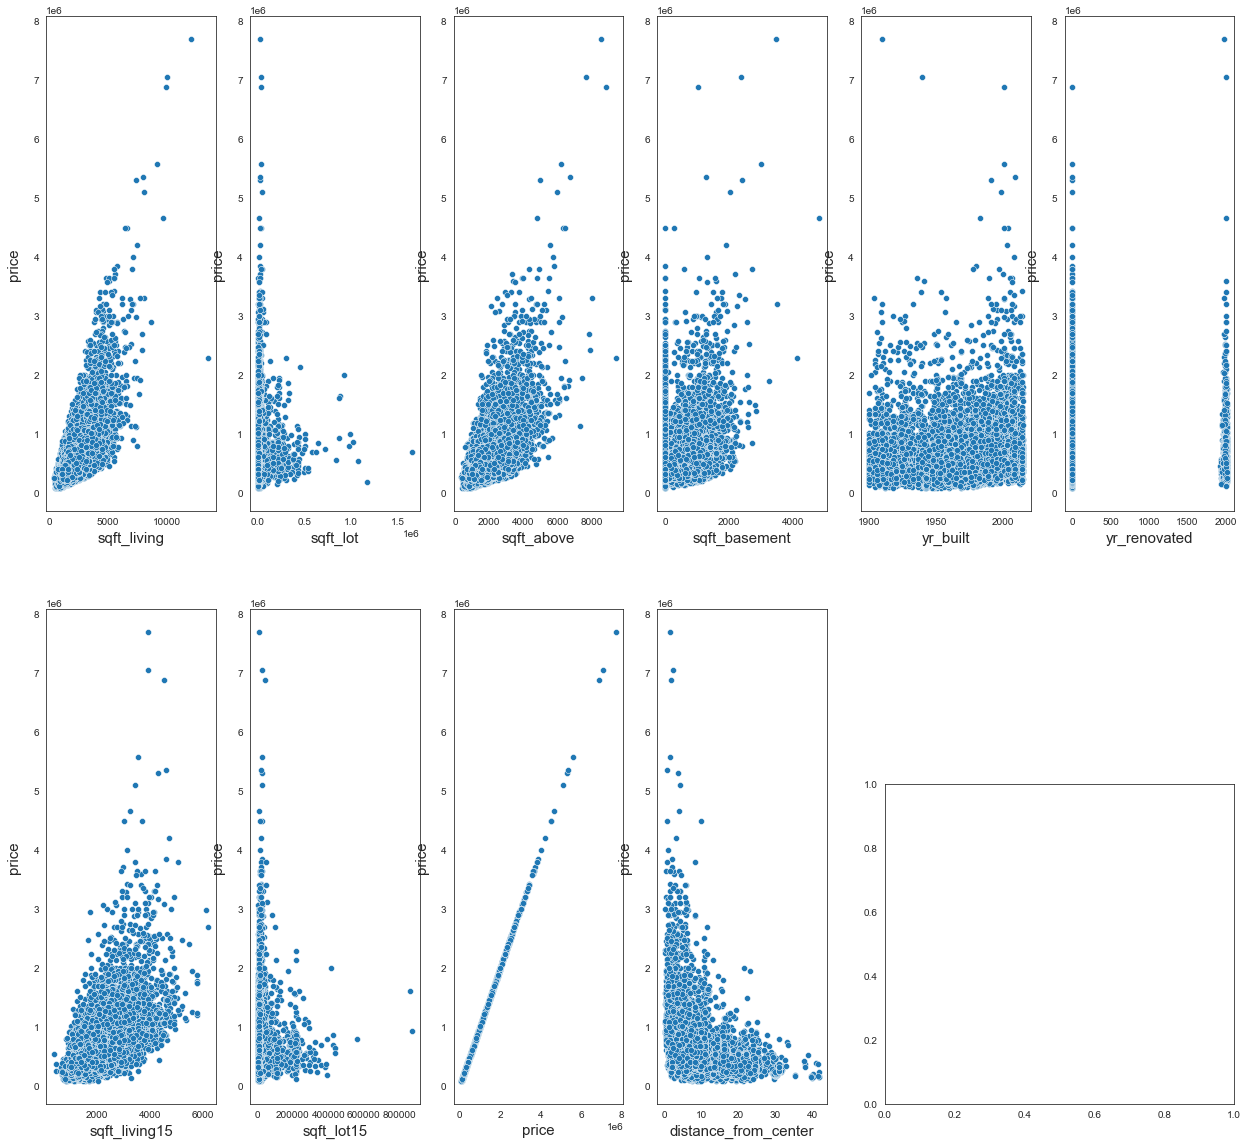

In [44]:
#numerical
fig,axs = plt.subplots(ncols=3, nrows=3, figsize =(12, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(numerical, 1):    
    plt.subplot(2, 6, i)
    sns.scatterplot(x=feature, y='price',  cmap = 'seismic', data=numerical)
    plt.xlabel('{}'.format(feature), size=15)
    plt.ylabel('price', size=15, labelpad=12.5)
plt.show() 

## Encoding

In [45]:
#encoding
categorical

,date,bedrooms,bathrooms,floors,waterfront,view,condition,grade,zipcode,coordinate,lat_long
0,1410,3,1,1,0,0,3,7,98178,"(47.5112, -122.257)",lat3_long1
1,1412,3,2.25,2,0,0,3,7,98125,"(47.721000000000004, -122.319)",lat4_long1
2,1502,2,1,1,0,0,3,6,98028,"(47.7379, -122.23299999999999)",lat4_long1
3,1412,4,3,1,0,0,5,7,98136,"(47.5208, -122.39299999999999)",lat3_long1
4,1502,3,2,1,0,0,3,8,98074,"(47.6168, -122.045)",lat3_long2
...,...,...,...,...,...,...,...,...,...,...,...
21592,1405,3,2.5,3,0,0,3,8,98103,"(47.6993, -122.346)",lat4_long1
21593,1502,4,2.5,2,0,0,3,8,98146,"(47.5107, -122.36200000000001)",lat3_long1
21594,1406,2,0.75,2,0,0,3,7,98144,"(47.5944, -122.29899999999999)",lat3_long1
21595,1501,3,2.5,2,0,0,3,8,98027,"(47.5345, -122.069)",lat3_long2


In [46]:
# separate category to 8 cats1 and 2 cats2 for different encoding
cats1 = pd.DataFrame()
cats1[['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade','date']] =categorical[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view','condition','grade','date']]
cats1.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,3,1,1,0,0,3,7,1410
1,3,2.25,2,0,0,3,7,1412
2,2,1,1,0,0,3,6,1502
3,4,3,1,0,0,5,7,1412
4,3,2,1,0,0,3,8,1502


In [47]:
# cats1 for ordinal encoding
enc = OrdinalEncoder()
OrdinalEncoder_ = enc.fit_transform(cats1[['bedrooms','bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'date']])
cats1

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,date
0,3,1,1,0,0,3,7,1410
1,3,2.25,2,0,0,3,7,1412
2,2,1,1,0,0,3,6,1502
3,4,3,1,0,0,5,7,1412
4,3,2,1,0,0,3,8,1502
...,...,...,...,...,...,...,...,...
21592,3,2.5,3,0,0,3,8,1405
21593,4,2.5,2,0,0,3,8,1502
21594,2,0.75,2,0,0,3,7,1406
21595,3,2.5,2,0,0,3,8,1501


In [48]:
OrdinalEncoder_

array([[2., 2., 0., ..., 2., 4., 5.],
       [2., 7., 2., ..., 2., 4., 7.],
       [1., 2., 0., ..., 2., 3., 9.],
       ...,
       [1., 1., 2., ..., 2., 4., 1.],
       [2., 8., 2., ..., 2., 5., 8.],
       [1., 1., 2., ..., 2., 4., 5.]])

In [49]:
#cats2 
cats2 = pd.DataFrame()
cats2[['zipcode','lat_long']] =categorical[['zipcode', 'lat_long']]
cats2.head()

,zipcode,lat_long
0,98178,lat3_long1
1,98125,lat4_long1
2,98028,lat4_long1
3,98136,lat3_long1
4,98074,lat3_long2


In [50]:
cats2=pd.get_dummies(data=cats2,drop_first=True)
cats2

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,lat_long_lat2_long2,lat_long_lat2_long3,lat_long_lat2_long4,lat_long_lat3_long1,lat_long_lat3_long2,lat_long_lat3_long3,lat_long_lat4_long1,lat_long_lat4_long2,lat_long_lat4_long3,lat_long_lat4_long4
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
# concat cats 1 and cats 2
cat_full = pd.concat([cats2, pd.DataFrame(OrdinalEncoder_)], axis =1)
cat_full.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,lat_long_lat4_long3,lat_long_lat4_long4,0,1,2,3,4,5,6,7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,5.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,7.0,2.0,0.0,0.0,2.0,4.0,7.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,9.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,3.0,10.0,0.0,0.0,0.0,4.0,4.0,7.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2.0,6.0,0.0,0.0,0.0,2.0,5.0,9.0


In [52]:
numerical

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,distance_from_center
0,1180,5650,1180,0,1955,0,1340,5650,221900,7.622786
1,2570,7242,2170,400,1951,1991,1690,7639,538000,7.766476
2,770,10000,770,0,1933,0,2720,8062,180000,8.561145
3,1960,5000,1050,910,1965,0,1360,5000,604000,6.655340
4,1680,8080,1680,0,1987,0,1800,7503,510000,7.402273
...,...,...,...,...,...,...,...,...,...,...
21592,1530,1131,1530,0,2009,0,1530,1509,360000,6.241665
21593,2310,5813,2310,0,2014,0,1830,7200,400000,6.910386
21594,1020,1350,1020,0,2009,0,1020,2007,402101,2.016289
21595,1600,2388,1600,0,2004,0,1410,1287,400000,8.420838


### concat numerical and categorical

In [53]:
data_full = pd.concat([numerical,cat_full ], axis = 1)
data_full.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,distance_from_center,...,lat_long_lat4_long3,lat_long_lat4_long4,0,1,2,3,4,5,6,7
0,1180,5650,1180,0,1955,0,1340,5650,221900,7.622786,...,0,0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,5.0
1,2570,7242,2170,400,1951,1991,1690,7639,538000,7.766476,...,0,0,2.0,7.0,2.0,0.0,0.0,2.0,4.0,7.0
2,770,10000,770,0,1933,0,2720,8062,180000,8.561145,...,0,0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,9.0
3,1960,5000,1050,910,1965,0,1360,5000,604000,6.655340,...,0,0,3.0,10.0,0.0,0.0,0.0,4.0,4.0,7.0
4,1680,8080,1680,0,1987,0,1800,7503,510000,7.402273,...,0,0,2.0,6.0,0.0,0.0,0.0,2.0,5.0,9.0


In [54]:
data_full = pd.concat([data_full, numerical['price']], axis =1)
data_full.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,distance_from_center,...,lat_long_lat4_long4,0,1,2,3,4,5,6,7,price
0,1180,5650,1180,0,1955,0,1340,5650,221900,7.622786,...,0,2.0,2.0,0.0,0.0,0.0,2.0,4.0,5.0,221900
1,2570,7242,2170,400,1951,1991,1690,7639,538000,7.766476,...,0,2.0,7.0,2.0,0.0,0.0,2.0,4.0,7.0,538000
2,770,10000,770,0,1933,0,2720,8062,180000,8.561145,...,0,1.0,2.0,0.0,0.0,0.0,2.0,3.0,9.0,180000
3,1960,5000,1050,910,1965,0,1360,5000,604000,6.655340,...,0,3.0,10.0,0.0,0.0,0.0,4.0,4.0,7.0,604000
4,1680,8080,1680,0,1987,0,1800,7503,510000,7.402273,...,0,2.0,6.0,0.0,0.0,0.0,2.0,5.0,9.0,510000


### Model

In [55]:
#Training and Test Dataset Split
prices1 = numerical['price']
features1 = data_full.drop(['price'], axis = 1)

prices2 = numerical['price']
features2 = data_full.drop(['price'], axis = 1)

prices3 = numerical['price']
features3 = data_full.drop(['price'], axis = 1)

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(features1, prices1, test_size=0.30, random_state=10)
X2_train, X2_test, y2_train, y2_test = train_test_split(features2, prices2, test_size=0.30, random_state=10)
X3_train, X3_test, y3_train, y3_test = train_test_split(features3, prices3, test_size=0.30, random_state=10)

In [57]:
# Linear Regression Model
regr = LinearRegression()
regr.fit(X1_train, y1_train)
#print('Training data r-squared:', regr.score(X1_train, y1_train)) #model score
print('Linear Regression r2 score:', regr.score(X1_test, y1_test)) #actual predict r square (Test data r-squared)
#print('Intercept', regr.intercept_)

Training data r-squared: 0.8152709922573061
Linear Regression r2 score: 0.8043776478520709


In [58]:
# KNN Model
neigh = KNeighborsRegressor(n_neighbors=5)
knn_model = neigh.fit(X2_train, y2_train)
knn_predictions = neigh.predict(X2_test)
print('KNN_r2 score:', r2_score(y2_test, knn_predictions))

KNN_r2 score: 0.5172633615031873


In [59]:
# Decision Tree Model
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X3_train, y3_train)
Tree_predictions = clf.predict(X3_test)
print('Tree_r2 score:', r2_score(y3_test, Tree_predictions))

Tree_r2 score: 0.7459470610552847


### Model Validation

In [60]:
X_incl_const = sm.add_constant(X1_train) # additional independent variables added to the model and adjust the metric to prevent overfitting issue.
model = sm.OLS(y1_train, X_incl_const.astype(float))
results = model.fit()
pd.DataFrame({'coef': results.params,'r-square':results.rsquared, 'adjusted r-square': results.rsquared_adj,'p-value': round(results.pvalues, 3)}) 

,coef,r-square,adjusted r-square,p-value
const,1.058742e+06,0.815271,0.814078,0.0
sqft_living,1.125976e+02,0.815271,0.814078,0.0
sqft_lot,2.295380e-01,0.815271,0.814078,0.0
sqft_above,9.972808e+01,0.815271,0.814078,0.0
sqft_basement,1.286964e+01,0.815271,0.814078,0.0
...,...,...,...,...
3,6.924306e+05,0.815271,0.814078,0.0
4,5.508186e+04,0.815271,0.814078,0.0
5,2.723167e+04,0.815271,0.814078,0.0
6,5.344111e+04,0.815271,0.814078,0.0


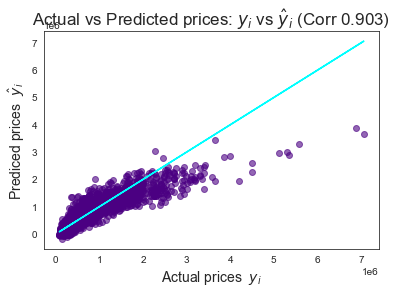

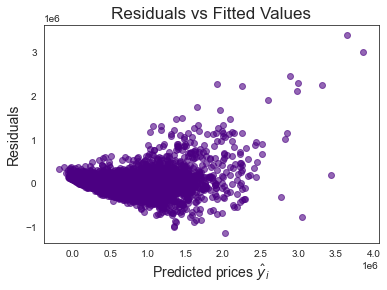

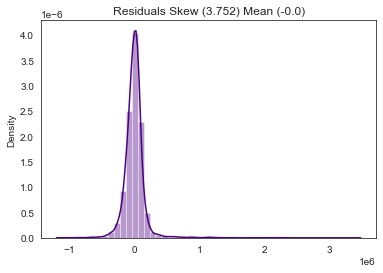

In [61]:
# Graph of Actual vs. Predicted Prices
corr = round(y1_train.corr(results.fittedvalues), 3)
plt.scatter(x=y1_train, y=results.fittedvalues, c='indigo', alpha=0.6)
plt.plot(y1_train, y1_train, color='cyan')

plt.xlabel('Actual prices  $y _i$', fontsize=14)
plt.ylabel('Prediced prices  $\hat y _i$', fontsize=14)
plt.title(f'Actual vs Predicted prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=17)
plt.show()

# Residuals vs Predicted values
plt.scatter(x=results.fittedvalues, y=results.resid, c='indigo', alpha=0.6)

plt.xlabel('Predicted prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residuals vs Fitted Values', fontsize=17)
plt.show()

# Residual Distribution Chart
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

sns.distplot(results.resid, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()


In [62]:
# Linear Regression
print('r-square:',round(regr.score(X1_test, y1_test),3)) # predict
print('adjusted r-square:', round(results.rsquared_adj,3))
print('mse:',mean_squared_error(y1_test, regr.predict(X1_test)))
print('rmse:',math.sqrt(mean_squared_error(y1_test, regr.predict(X1_test))))
print('mae:',mean_absolute_error(y1_test, regr.predict(X1_test)))

r-square: 0.804
adjusted r-square: 0.814
mse: 25430550899.544945
rmse: 159469.59239787672
mae: 95710.68846958899


In [63]:
# Knn
print('r-square:',round(r2_score(y2_test, knn_predictions),3)) # predict
print('adjusted r-square:', round((1-r2_score(y2_test, knn_predictions))*(len(y2_test)-1)/(len(y2_test)-features2.shape[1]-1),3)) #1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print('mse:',mean_squared_error(y2_test, neigh.predict(X2_test)))
print('rmse:',math.sqrt(mean_squared_error(y2_test, neigh.predict(X2_test))))
print('mae:',mean_absolute_error(y2_test, neigh.predict(X2_test)))

r-square: 0.517
adjusted r-square: 0.49
mse: 62754887269.14577
rmse: 250509.25585523935
mae: 155717.89308641973


In [64]:
# Decision Tree
print('r-square:',round(r2_score(y3_test, Tree_predictions),3)) # predict
print('adjusted r-square:', round((1-r2_score(y3_test, Tree_predictions))*(len(y3_test)-1)/(len(y3_test)-features3.shape[1]-1),3))
print('mse:',mean_squared_error(y2_test, clf.predict(X3_test)))
print('rmse:',math.sqrt(mean_squared_error(y2_test, clf.predict(X3_test))))
print('mae:',mean_absolute_error(y2_test, clf.predict(X3_test)))

r-square: 0.746
adjusted r-square: 0.258
mse: 33026421183.84815
rmse: 181731.72861074135
mae: 101573.74629629629
